In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data', index_col = 0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
#     The sklearn.preprocessing package provides several common utility functions and 
#     transformer classes to change raw feature vectors into a representation that is 
#     more suitable for the downstream estimators.

#     In general, learning algorithms benefit from standardization of the data set. If 
#     some outliers are present in the set, robust scalers or transformers are more appropriate. 
#     The behaviors of the different scalers, transformers, and normalizers on a dataset 
#     containing marginal outliers is highlighted in Compare the effect of different scalers on 
#     data with outliers.

from sklearn.preprocessing import StandardScaler

In [6]:
#     StandardScaler. StandardScaler standardizes a feature by subtracting the mean and 
#     then scaling to unit variance. Unit variance means dividing all the values by the 
#     standard deviation

scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [9]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [10]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [12]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
#     X corresponds to your float feature matrix of shape (n_samples, n_features) 
#     (aka. the design matrix of your training set)

#     y is the float target vector of shape (n_samples,) (the label vector). 
#     In your case, label 0 could correspond to a spam example, and 1 to a ham one


X = df_feat
y = df['TARGET CLASS']

In [14]:
#        train_test_split. Quick utility that wraps input validation and 
#        next(ShuffleSplit(). split(X, y)) and application to input data into a 
#        single call for splitting (and optionally subsampling) data in a oneliner. 
#        Allowed inputs are lists, numpy arrays, 
#       scipy-sparse matrices or pandas dataframes.


from sklearn.model_selection import train_test_split

In [15]:
#       The test set is a subset of the data set that you use 
#       to test your model after the model has gone through initial 
#       vetting by the validation set. x_test is the test data set. y_test 
#       is the set of labels to all the data in x_test .

#       test_size — This parameter decides the size of the data that has to be split 
#       as the test dataset. This is given as a fraction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#       K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one 
#       of the topmost machine learning algorithms. KNN used in the variety of applications 
#       such as finance, healthcare, political science, handwriting detection, image recognition 
#       and video recognition. In Credit ratings, financial institutes will predict the credit 
#       rating of customers. In loan disbursement, banking institutes will predict whether the 
#       loan is safe or risky. In political science, classifying potential voters in two classes 
#       will vote or won’t vote. KNN algorithm used for both classification and regression problems. 
#       KNN algorithm based on feature similarity approach



from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

In [20]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [21]:
#     The sklearn. metrics module implements several loss, score, and utility 
#     functions to measure classification performance. Some metrics might require 
#     probability estimates of the positive class, confidence values, or binary 
#     decisions values

from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [23]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


In [24]:
plt.figure(figsize = (10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [25]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error Rate')

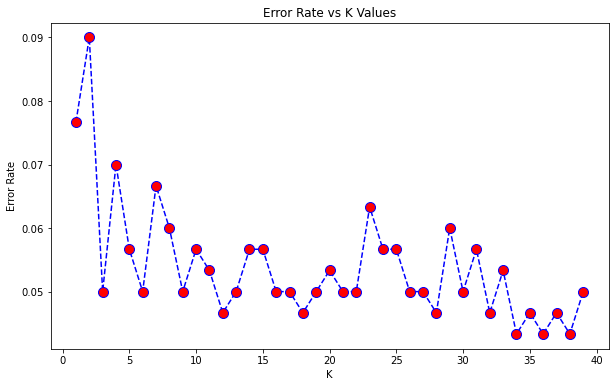

In [26]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle ='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error Rate vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test, pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

